<a href="https://colab.research.google.com/github/claredavies/Image3DCoursework/blob/main/Image3DTemplateMatching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/bmalcover/image3D.git

fatal: destination path 'image3D' already exists and is not an empty directory.


Import Libraries

# **Pattern Matching**
Extracted from the OpenCV documentation:

OpenCV comes with a function matchTemplate for this purpose. It simply slides the template image over the input image and compares the template and patch of input image under the template image.

**Exercise**
Given the following image and the corresponding template, you have to paint a green dot in the center of as many diamonds as you can but minimizing the number of False Positives (false detections).

**Conditions:** You can't manipulate any image outside the program.

**Deadline:** Friday 7th, 19:00h

Load Images

In [130]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [131]:
def draw_dot_at_centre(loc, template, image):
  for pt in zip(*loc[::-1]):
      (startX, startY) = pt
      endX = startX + template.shape[1]
      endY = startY + template.shape[0]
      centreX = (startX + endX)/2
      centreY = (startY + endY)/2

      cv2.circle(image, (int(centreX), int(centreY)), 1, (0, 255, 0), 1)

In [ ]:
def remove_background(img, threshold):    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, threshed = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY_INV)

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    morphed = cv2.morphologyEx(threshed, cv2.MORPH_CLOSE, kernel)

    cnts = cv2.findContours(morphed, 
                            cv2.RETR_EXTERNAL,
                            cv2.CHAIN_APPROX_SIMPLE)[0]

    cnt = sorted(cnts, key=cv2.contourArea)[-1]

    mask = cv2.drawContours(threshed, cnt, 0, (0, 255, 0), 0)
    masked_data = cv2.bitwise_and(img, img, mask=mask)

    x, y, w, h = cv2.boundingRect(cnt)
    dst = masked_data[y: y + h, x: x + w]

    # dst_gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
    # _, alpha = cv2.threshold(dst_gray, 0, 255, cv2.THRESH_BINARY)
    # b, g, r = cv2.split(dst)

    # rgba = [r, g, b, alpha]
    # dst = cv2.merge(rgba, 4)

    return mask

In [ ]:
# Load images in the BGR space
img_rgb = cv2.imread("image3D/Pattern Matching/input/cards_mini.png")
 
# Show the final image with the matched area.
cv2_imshow(remove_background(img_rgb, 120))

array([[[  0,   0,   0],
        [ 19,  24,  23],
        [ 19,  24,  23],
        ...,
        [ 59,  89, 130],
        [ 59,  89, 130],
        [ 59,  89, 130]],

       [[ 19,  24,  23],
        [ 19,  24,  23],
        [ 19,  24,  23],
        ...,
        [ 59,  88, 132],
        [ 59,  88, 133],
        [ 59,  88, 132]],

       [[ 19,  24,  23],
        [ 19,  24,  23],
        [ 19,  24,  23],
        ...,
        [ 57,  88, 133],
        [ 57,  87, 134],
        [ 57,  88, 133]],

       ...,

       [[ 26,  45,  78],
        [ 26,  45,  78],
        [ 26,  45,  78],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 26,  45,  78],
        [ 26,  45,  78],
        [ 26,  45,  78],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 26,  45,  78],
        [ 26,  45,  78],
        [ 26,  45,  78],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [132]:
def resize_image(image, scale_percent):
  # scale_percent = 220 # percent of original size
  width = int(image.shape[1] * scale_percent / 100)
  height = int(image.shape[0] * scale_percent / 100)
  dim = (width, height)

  resized_image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
  return resized_image

In [136]:
def template_matching(image, template, threshold):
  #Applying Gaussian blur to image to reduce noise.
  blur_image = cv2.GaussianBlur(image,(3,3),0)
  # #Converting image to grayscale
  blur_image = cv2.cvtColor(blur_image, cv2.COLOR_BGR2GRAY)

  #Converting template to grayscale.
  smallTemplate = template
  smallTemplate = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

  largeTemplate = resize_image(smallTemplate, 220)

  resLargeTemplate = cv2.matchTemplate(blur_image, largeTemplate, cv2.TM_CCOEFF_NORMED)
  resSmallTemplate = cv2.matchTemplate(blur_image, smallTemplate, cv2.TM_CCOEFF_NORMED)
  
  # Store the coordinates of matched area in a numpy array
  locLargeTemplate = np.where(resLargeTemplate >= threshold)
  locSmallTemplate = np.where(resSmallTemplate >= threshold)


  # Draw a circle in centre of the matched region.
  draw_dot_at_centre(locLargeTemplate, largeTemplate, image)
  draw_dot_at_centre(locSmallTemplate, smallTemplate, image)
  
  cv2_imshow(image)

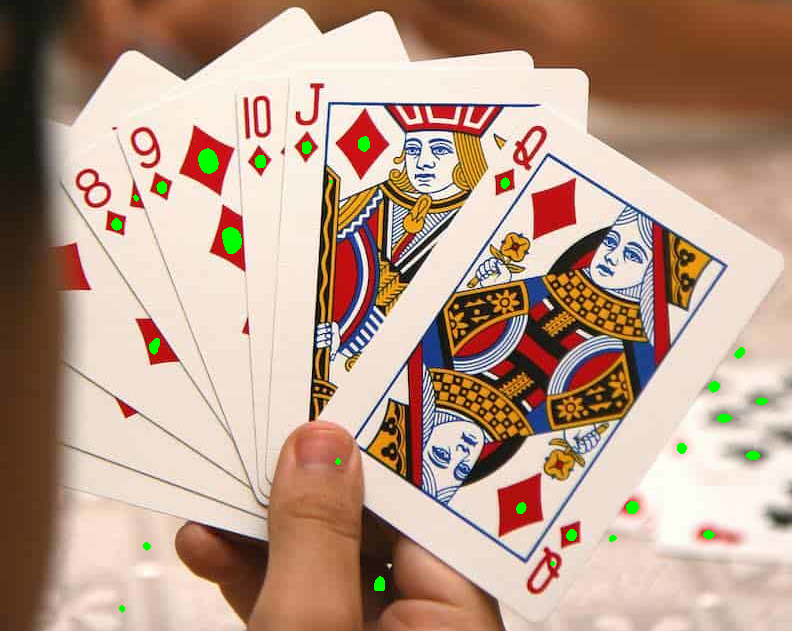

In [137]:
# Load images in the BGR space
img_rgb = cv2.imread("image3D/Pattern Matching/input/cards_mini.png")
template = cv2.imread("image3D/Pattern Matching/input/diamond.png")
 
# Show the final image with the matched area.
template_matching(img_rgb, template, 0.6)